# Autoencoder convolucional

## Importação das bibliotecas

In [2]:
# @title
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape, Flatten
tf.__version__

# EXPLICAÇÃO DAS BIBLIOTECAS

# UpSampling2D: utilizado para aumentar a dimensionalidade
# MaxPooling2D: utilizado para dimnuir a dimensionalidade
# Reshape: utilizado para mudar o formato dos dados do tensorflow
# Flatten: utilizado para mudar o formato de matriz para vetor

## Carregamento da base de dados

- Dataset: https://keras.io/api/datasets/fashion_mnist/

In [3]:
from tensorflow.keras.datasets import fashion_mnist, cifar10

In [4]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
X_treinamento.shape, y_treinamento.shape

((50000, 32, 32, 3), (50000, 1))

In [6]:
X_teste.shape, y_teste.shape

((10000, 32, 32, 3), (10000, 1))

## Visualização das imagens

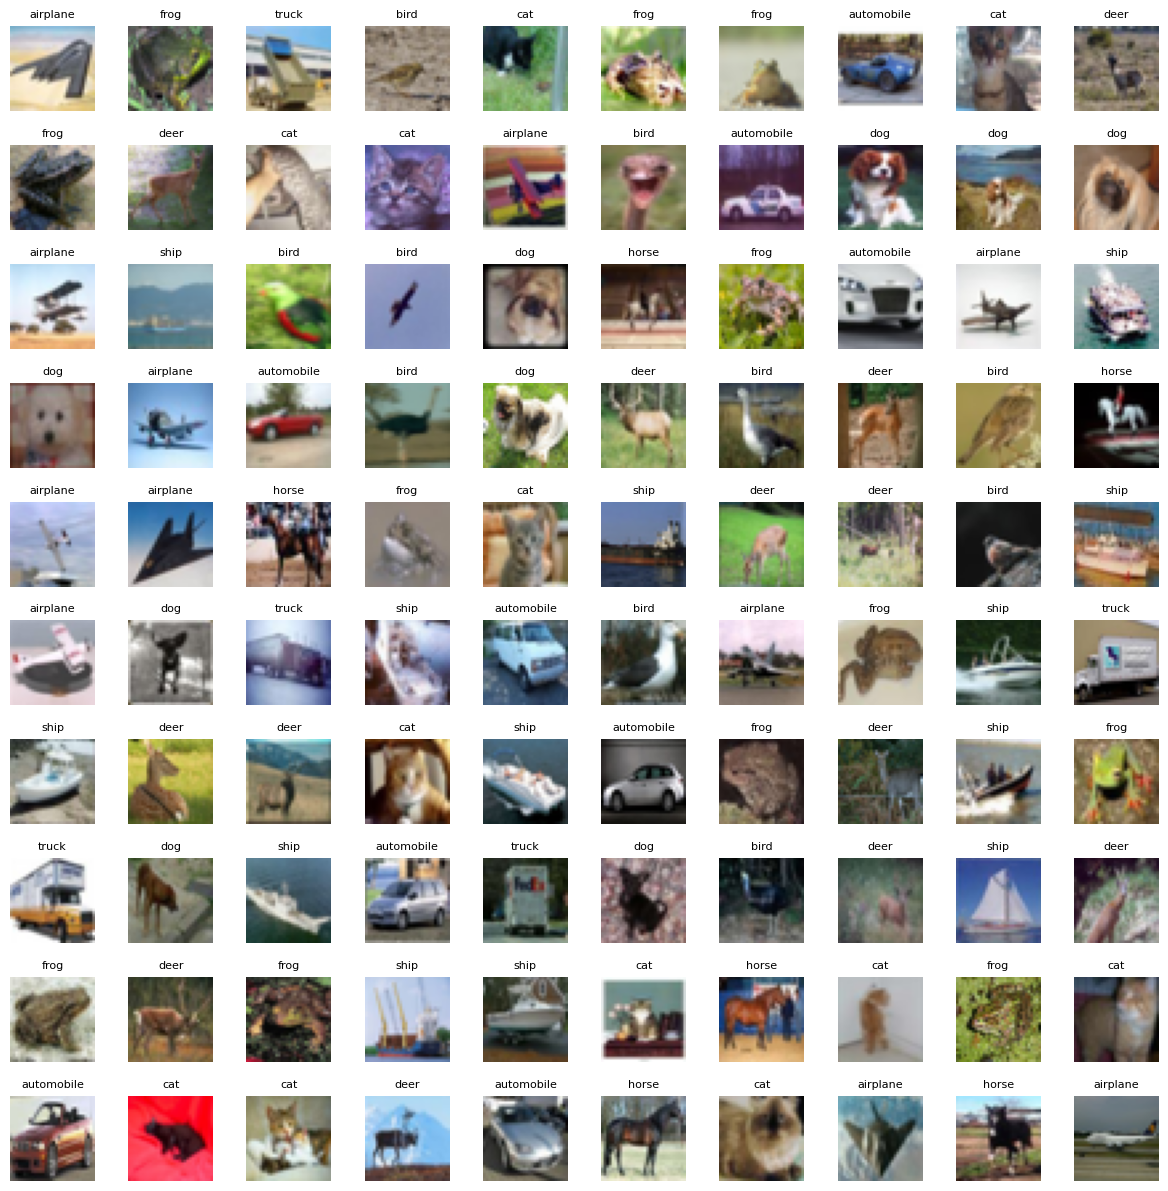

In [7]:
#classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
largura = 10
altura = 10
fig, axes = plt.subplots(altura, largura, figsize = (15,15))
axes = axes.ravel()
for i in np.arange(0, largura * altura):
    indice = np.random.randint(0, 50000) # Correct the upper bound for CIFAR-10
    axes[i].imshow(X_treinamento[indice], cmap = 'gray' )
    axes[i].set_title(classes[y_treinamento[indice][0]], fontsize = 8) # Access the scalar value
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

## Pré-processamento das imagens

In [8]:
X_treinamento = X_treinamento / 255
X_teste = X_teste / 255

In [9]:
X_treinamento.shape, X_teste.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [10]:
X_treinamento = X_treinamento.reshape((len(X_treinamento), 32, 32, 3))
X_teste = X_teste.reshape((len(X_teste), 32, 32, 3))

In [11]:
X_treinamento.shape, X_teste.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

## Construção e treinamento do autoencoder convolucional

In [17]:
# Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

autoencoder = Sequential()

# Encoder
autoencoder.add(Conv2D(filters = 16,
                       kernel_size=(3,3),
                       activation='relu',
                       padding='valid',
                       input_shape=(32,32,3)))

autoencoder.add(MaxPooling2D(pool_size = (2,2)))


autoencoder.add(Conv2D(filters = 8,
                       kernel_size=(3,3),
                       activation='relu',
                       padding='same'))

autoencoder.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))


#autoencoder.summary()

# ÚLTIMA CAMADA DO ENCODER
autoencoder.add(Conv2D(filters = 8,
                       kernel_size=(3,3),
                       activation='relu',
                       padding='same',
                       strides=(2,2))) # Strides: NA LEITURA DA MATRIZ, PULA 2 COLUNAS!

autoencoder.add(Flatten())

#autoencoder.summary()

# Decoder
autoencoder.add(Reshape((4,4,8)))
#autoencoder.summary()
autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding = 'same'))
#autoencoder.summary()

# UTILIZA-SE O UpSampling2D PARA AUMENTAR A DIMENSIONALIDADE
autoencoder.add(UpSampling2D(size=(2,2)))
#autoencoder.summary()

autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding = 'same'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters=3, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 15, 15, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_5 (Reshape)             │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_15 (UpSampling2D) │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_16 (UpSampling2D) │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 16, 16, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_17 (UpSampling2D) │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 32, 32, 3)      │           435 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,963 (19.39 KB)

 Trainable params: 4,963 (19.39 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Output = (Input - Filter + 1) / Stride

# Input: (28, 28, 1)
# Filter size: 3
# Output = (28 - 3 + 1) / 1 -> (26, 26, 16)

# UpSampling2D: (16, 16, 8)
# Filter size: 3
# Output = (16 - 3 + 1) / 1 -> (14, 14, 16)

In [ ]:
# Output = (Input - Filter + 1) / Stride

# Input: (32, 32, 3)
# Filter size: 3
# Output = (32 - 3 + 1) / 1 -> (30, 30, 16)

In [20]:
(32 - 3 + 1) / 1

30.0

In [ ]:
(16 - 3 + 1) / 1

14.0

In [ ]:
(28 - 3 + 1) / 1

26.0

In [ ]:
4 * 4 * 8

128

In [18]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
autoencoder.fit(X_treinamento, X_treinamento, epochs=100)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.3973 - loss: 0.7745
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.4292 - loss: 0.6018
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4772 - loss: 0.6002
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4498 - loss: 0.5958
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4128 - loss: 0.5997
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4398 - loss: 0.5930
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4565 - loss: 0.5885
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3940 - loss: 0.6225
Epoch 9/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4455 - loss: 0.6082
Epoch 10/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4618 - loss: 0.5943
Epoch 11/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4298 - loss: 0.6009
Epoch 12/10

## Codificação e decodificação das imagens de teste

In [21]:
autoencoder.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 15, 15, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_5 (Reshape)             │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_15 (UpSampling2D) │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_16 (UpSampling2D) │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 16, 16, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_17 (UpSampling2D) │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 32, 32, 3)      │           435 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,891 (58.17 KB)

 Trainable params: 4,963 (19.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,928 (38.79 KB)

In [24]:
autoencoder.get_layer('conv2d_35').input

<KerasTensor shape=(None, 32, 32, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_530>

In [25]:
encoder = Model(inputs = autoencoder.get_layer('conv2d_35').input,
                outputs = autoencoder.get_layer('flatten_5').output)

encoder.summary()

Model: "functional_84"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 15, 15, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 128)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,192 (8.56 KB)

 Trainable params: 2,192 (8.56 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
imagens_teste_codificadas = encoder.predict(X_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [27]:
imagens_teste_codificadas.shape

(10000, 128)

In [28]:
imagens_teste_codificadas[0]

array([0.21086538, 0.02608876, 0.01488216, 0.2828824 , 0.        ,
       0.16524336, 0.        , 0.28735065, 0.23789378, 0.        ,
       0.04459804, 0.29137456, 0.        , 0.22969802, 0.        ,
       0.29947874, 0.23894402, 0.09175132, 0.1605093 , 0.21762222,
       0.        , 0.15197988, 0.        , 0.2803548 , 0.20460713,
       0.0409482 , 0.07372419, 0.2032997 , 0.12946498, 0.13521376,
       0.        , 0.29229963, 0.3047223 , 0.06680688, 0.17667037,
       0.25437668, 0.        , 0.22247693, 0.        , 0.27344227,
       0.32441854, 0.        , 0.22821182, 0.23253179, 0.        ,
       0.24150902, 0.        , 0.37771362, 0.20488912, 0.08323307,
       0.28624678, 0.18064737, 0.        , 0.2325224 , 0.        ,
       0.31410217, 0.22977053, 0.13194013, 0.18982072, 0.17022139,
       0.0631322 , 0.15302874, 0.        , 0.21151584, 0.41045657,
       0.089886  , 0.30398506, 0.24160597, 0.        , 0.19408897,
       0.        , 0.33454597, 0.32122424, 0.08026613, 0.30372

In [29]:
imagens_teste_decodificadas = autoencoder.predict(X_teste) # DECODIFICAÇÃO DA IMAGEM

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [30]:
imagens_teste_decodificadas.shape

(10000, 32, 32, 3)

In [31]:
16 * 8

128

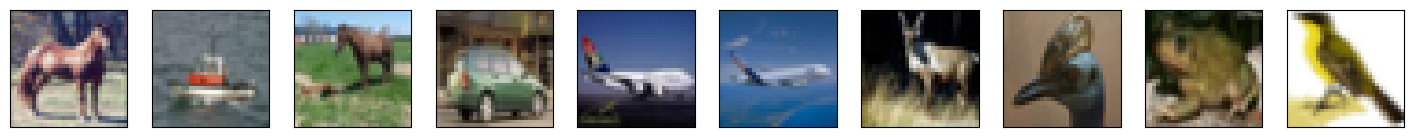

In [34]:
numero_imagens = 10
imagens_teste = np.random.randint(0, 10000, size = numero_imagens)
plt.figure(figsize=(18,18))
for i, imagem_indice in enumerate(imagens_teste):
  # Imagem original
  ax = plt.subplot(10,10, i+1)
  plt.imshow(X_teste[imagem_indice].reshape(32,32,3), cmap='gray')
  plt.xticks(())
  plt.yticks(())

([], [])

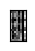

In [35]:
  # Imagens codificadas
  ax = plt.subplot(10,10, i+1+numero_imagens)
  plt.imshow(imagens_teste_codificadas[imagem_indice].reshape(16,8), cmap='gray')
  plt.xticks(())
  plt.yticks(())

([], [])

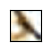

In [37]:
  # Imagens decodificadas
  ax = plt.subplot(10,10, i+1+numero_imagens*2)
  plt.imshow(imagens_teste_decodificadas[imagem_indice].reshape(32,32,3), cmap='gray')
  plt.xticks(())
  plt.yticks(())